# Statistics_V2
#### Purpose
This notebook will polish the previous statistics notebook using cleaned data

#### Version History 
Created: 15/05/2025, Alex Dunne Hackathon

In [2]:
#Import Required Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os

## ERA 5 Data Clean

In [3]:
# Read in data
data_ERA = pd.read_csv('/scratch/nf33/ad1803/hk25-AusCyclones/ETC_workfolder/ETCs_Climatology_ERA5/Data/stitchNodes/stitchNodes.csv') #Full 40 year ERA5 Climatology

In [88]:
#Use only ERA5 Feb 2020 to Feb 2021 Data

# Filter between Feb 2020 and Feb 2021
df_filt_ERA_time = data_ERA[
    ((data_ERA[' year'] == 2020) & (data_ERA[' month'] >= 2)) |
    ((data_ERA[' year'] == 2021) & (data_ERA[' month'] <= 2))
].reset_index(drop=True)


df_filt_ERA_time

,track_id,year,month,day,hour,i,j,lon,lat,msl,zs
0,118361,2020,2,1,0,745,91,6.25,67.25,96157.42,-0.465489
1,118361,2020,2,1,6,746,89,6.50,67.75,95997.22,0.267026
2,118361,2020,2,1,12,747,89,6.75,67.75,96001.23,-0.099231
3,118361,2020,2,1,18,757,92,9.25,67.00,96257.48,-0.923310
4,118361,2020,2,2,0,766,94,11.50,66.50,96532.30,5.028372
...,...,...,...,...,...,...,...,...,...,...,...
38972,121559,2021,2,28,18,369,180,-87.75,45.00,100158.30,192.918400
38973,121560,2021,2,28,12,1149,616,107.25,-64.00,97581.80,0.450155
38974,121560,2021,2,28,18,1168,617,112.00,-64.25,97593.62,0.999541
38975,121561,2021,2,28,12,498,626,-55.50,-66.50,96293.31,2.556134


In [102]:

#--------------------------------------------------------------------------------------------------#
#Duration
#--------------------------------------------------------------------------------------------------#
#Create new data frame 
df = pd.DataFrame(df_filt_ERA_time)

# Calculate ETC duration (count of rows * 6 hours)
track_counts = df['track_id'].value_counts().sort_index()
duration_hours_ERA = track_counts * 6
duration_df = duration_hours_ERA.reset_index()
duration_df.columns = ['track_id', 'trk_dur'] # Sets up data frame of track id and duration

#--------------------------------------------------------------------------------------------------#
#Latitude
#--------------------------------------------------------------------------------------------------#
# Create a new data frame for average lat 
df_lat = pd.DataFrame(data_ERA)

# Group by trackID and calculate average latitude for ERA5 Data 
avg_lat_df_ERA = df_lat.groupby('track_id')[' lat'].mean().reset_index()
avg_lat_df_ERA.columns = ['track_id', 'avg_lat']

#--------------------------------------------------------------------------------------------------#
#Minimum MSLP - Min Depth
#--------------------------------------------------------------------------------------------------#
# Create a new data frame for average lat 
df_min_depth = pd.DataFrame(data_ERA)

# Minimum Cyclone Depth
min_depth_df_ERA = df_min_depth.groupby('track_id')[' msl'].min().reset_index()
min_depth_df_ERA.columns = ['track_id', 'min_depth']

#--------------------------------------------------------------------------------------------------#
#Average MSLP - Avg Depth
#--------------------------------------------------------------------------------------------------#
# Create a new data frame for average lat 
df_avg_depth = pd.DataFrame(data_ERA)

# Minimum Cyclone Depth
avg_depth_df_ERA = df_avg_depth.groupby('track_id')[' msl'].mean().reset_index()
avg_depth_df_ERA.columns = ['track_id', 'avg_depth']

#--------------------------------------------------------------------------------------------------#
#Merge into one complete dataframe 
#--------------------------------------------------------------------------------------------------#

# Merge results
ERA_df_grouped = duration_df[['track_id', 'trk_dur']] \
    .merge(avg_lat_df_ERA[['track_id', 'avg_lat']], on='track_id') \
    .merge(min_depth_df_ERA[['track_id', 'min_depth']], on='track_id') \
    .merge(avg_depth_df_ERA[['track_id', 'avg_depth']], on='track_id')


#--------------------------------------------------------------------------------------------------#
#Exclude Tropical Cyclone Tracks on Average Latitude
#--------------------------------------------------------------------------------------------------#

# Filter out rows where latitude is between -25 and 25
df_filt_ERA = ERA_df_grouped[~ERA_df_grouped['avg_lat'].between(-25, 25)]

# Reindex data frame
df_filt_ERA = df_filt_ERA.reset_index(drop=True)


#--------------------------------------------------------------------------------------------------#
#Normalise for a year
#--------------------------------------------------------------------------------------------------#

#Normalise duration to make a year 
#cols_to_normalize = ['trk_dur', 'avg_depth']
#df_filt_ERA[cols_to_normalize] = (df_filt_ERA[cols_to_normalize] - df_filt_ERA[cols_to_normalize].mean()) / df_filt_ERA[cols_to_normalize].std()

df_filt_ERA


,track_id,trk_dur,avg_lat,min_depth,avg_depth
0,118361,126,63.128378,95997.22,97578.661351
1,118363,36,55.304348,95515.27,97661.435217
2,118365,6,85.433333,98970.62,99763.191333
3,118373,12,41.708333,100127.90,100670.325000
4,118375,96,56.490000,97501.35,98995.114800
...,...,...,...,...,...
2956,121556,18,46.675000,99334.24,99771.278000
2957,121558,18,-47.431818,97409.37,97585.662727
2958,121559,12,51.187500,98045.44,99097.053750
2959,121560,12,-67.867647,97241.85,97885.371176


## High Res Data Clean

In [94]:
#Read in data
data_HRes = pd.read_csv('/scratch/nf33/ad1803/hk25-AusCyclones/ETC_workfolder/ETCs_Climatology_HRes/ETCs_hres_clim/stitchNodes/stitchNodes.csv') #Feb 2020 to Feb 2021 of High Res Model
data_HRes

,track_id,year,month,day,hour,i,j,lon,lat,msl,zs
0,0,2020,2,1,0,59,42,-165.25,-79.50,98480.72,0.083897
1,0,2020,2,1,6,79,44,-160.25,-79.00,98462.62,-0.190796
2,0,2020,2,1,12,97,41,-155.75,-79.75,98470.78,-0.282360
3,0,2020,2,1,18,106,40,-153.50,-80.00,98527.91,0.175462
4,0,2020,2,2,0,112,40,-152.00,-80.00,98760.34,0.175462
...,...,...,...,...,...,...,...,...,...,...,...
38634,3376,2021,2,27,18,936,507,54.00,36.75,100007.10,0.083897
38635,3376,2021,2,28,0,939,509,54.75,37.25,99562.02,0.083897
38636,3376,2021,2,28,6,939,512,54.75,38.00,99393.25,-0.099231
38637,3376,2021,2,28,12,949,514,57.25,38.50,99144.49,-0.190796


In [100]:
#--------------------------------------------------------------------------------------------------#
#Duration
#--------------------------------------------------------------------------------------------------#
#Create new data frame 
df_HRes = pd.DataFrame(data_HRes)

# Calculate ETC duration (count of rows * 6 hours)
track_counts = df_HRes['track_id'].value_counts().sort_index()
duration_hours_HRes = track_counts * 6
duration_df_HRes = duration_hours_HRes.reset_index()
duration_df_HRes.columns = ['track_id', 'trk_dur'] # Sets up data frame of track id and duration

#--------------------------------------------------------------------------------------------------#
#Latitude
#--------------------------------------------------------------------------------------------------#
# Create a new data frame for average lat 
df_lat_HRes = pd.DataFrame(data_HRes)

# Group by trackID and calculate average latitude for ERA5 Data 
avg_lat_df_HRes = df_lat_HRes.groupby('track_id')[' lat'].mean().reset_index()
avg_lat_df_HRes.columns = ['track_id', 'avg_lat']

#--------------------------------------------------------------------------------------------------#
#Minimum MSLP - Min Depth
#--------------------------------------------------------------------------------------------------#
# Create a new data frame for average lat 
df_min_depth_HRes = pd.DataFrame(data_HRes)

# Minimum Cyclone Depth
min_depth_df_HRes = df_min_depth_HRes.groupby('track_id')[' msl'].min().reset_index()
min_depth_df_HRes.columns = ['track_id', 'min_depth']

#--------------------------------------------------------------------------------------------------#
#Average MSLP - Avg Depth
#--------------------------------------------------------------------------------------------------#
# Create a new data frame for average lat 
df_avg_depth_HRes = pd.DataFrame(data_HRes)

# Minimum Cyclone Depth
avg_depth_df_HRes = df_avg_depth_HRes.groupby('track_id')[' msl'].mean().reset_index()
avg_depth_df_HRes.columns = ['track_id', 'avg_depth']

#--------------------------------------------------------------------------------------------------#
#Merge into one complete dataframe 
#--------------------------------------------------------------------------------------------------#

# Merge results
HRes_df_grouped = duration_df_HRes[['track_id', 'trk_dur']] \
    .merge(avg_lat_df_HRes[['track_id', 'avg_lat']], on='track_id') \
    .merge(min_depth_df_HRes[['track_id', 'min_depth']], on='track_id') \
    .merge(avg_depth_df_HRes[['track_id', 'avg_depth']], on='track_id')


#--------------------------------------------------------------------------------------------------#
#Exclude Tropical Cyclone Tracks on Average Latitude
#--------------------------------------------------------------------------------------------------#

# Filter out rows where latitude is between -25 and 25
df_filt_HRes = HRes_df_grouped[~HRes_df_grouped['avg_lat'].between(-25, 25)]

# Reindex data frame
df_filt_HRes = df_filt_HRes.reset_index(drop=True)


#--------------------------------------------------------------------------------------------------#
#Normalise for a year
#--------------------------------------------------------------------------------------------------#

#Normalise duration to make a year 
#cols_to_normalize = ['trk_dur', 'avg_depth']
#df_filt_HRes[cols_to_normalize] = (df_filt_HRes[cols_to_normalize] - df_filt_HRes[cols_to_normalize].mean()) / df_filt_HRes[cols_to_normalize].std()

df_filt_HRes

,track_id,trk_dur,avg_lat,min_depth,avg_depth
0,0,42,-79.750000,98462.62,98702.115714
1,1,30,-69.950000,96858.93,97273.864000
2,2,108,-62.388889,97005.02,97982.833889
3,3,102,-64.514706,96262.75,97219.401765
4,4,60,-55.850000,96608.71,97301.049000
...,...,...,...,...,...
3070,3372,42,-62.107143,95913.67,96826.887143
3071,3373,36,-64.958333,96871.45,97074.951667
3072,3374,36,53.958333,98253.96,98577.986667
3073,3375,36,70.666667,98606.58,99391.915000


# Comparison Plots

#### ERA5 Data always... in BLUE, on the LEFT
#### High Res Data always... in RED, on the RIGHT

## Duration Comparison

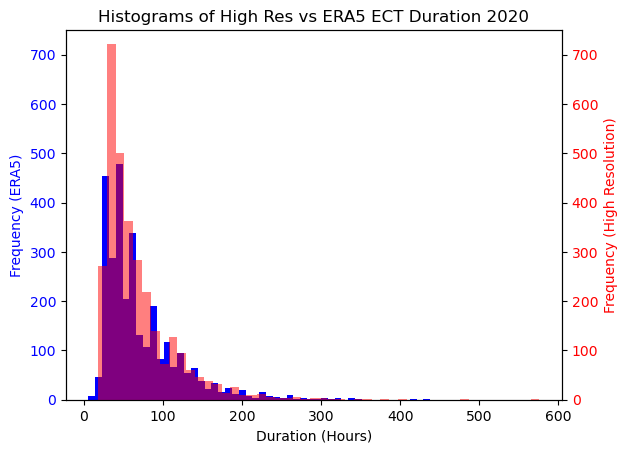

In [121]:
#Set up the histograms on two different y-axis for comparison

fig, ax1 = plt.subplots()

# ERA5 histogram on the left y-axis
ax1.hist(df_filt_ERA.trk_dur, bins = 50, label = 'ERA5 Frequency', color ='blue')
ax1.set_xlabel('Duration (Hours)')
ax1.set_ylabel('Frequency (ERA5)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim((0,750))


# Create a second y-axis
ax2 = ax1.twinx()

# High Resolution histogram on the right y-axis
ax2.hist(df_filt_HRes.trk_dur, bins=50, alpha= 0.5, label='High Resolution Frequency', color='red')
ax2.set_ylabel('Frequency (High Resolution)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim((0,750))

plt.title('Histograms of High Res vs ERA5 ECT Duration 2020')
plt.show()

## Latitude Comparison

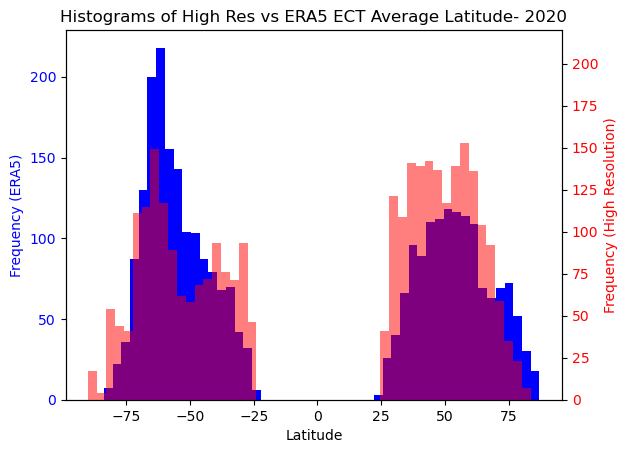

In [122]:
#Set up the histograms on two different y-axis for comparison

fig, ax1 = plt.subplots()

# ERA5 histogram on the left y-axis
ax1.hist(df_filt_ERA.avg_lat, bins = 50, label = 'ERA5 Frequency', color ='blue')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Frequency (ERA5)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# High Resolution histogram on the right y-axis
ax2.hist(df_filt_HRes.avg_lat, bins=50, alpha= 0.5, label='High Resolution Frequency', color='red')
ax2.set_ylabel('Frequency (High Resolution)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim((0,220))
plt.title('Histograms of High Res vs ERA5 ECT Average Latitude- 2020')
plt.show()

## Minimum Depth Comparison

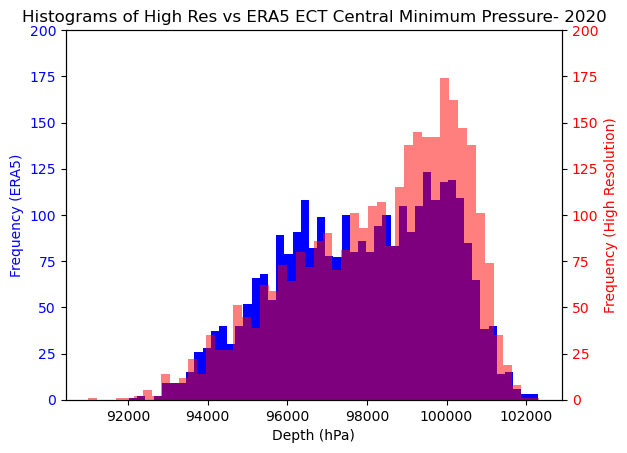

In [124]:
#Set up the histograms on two different y-axis for comparison

fig, ax1 = plt.subplots()

# ERA5 histogram on the left y-axis
ax1.hist(df_filt_ERA.min_depth, bins = 50, label = 'ERA5 Frequency', color ='blue')
ax1.set_xlabel('Depth (hPa)')
ax1.set_ylabel('Frequency (ERA5)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim((0,200))

# Create a second y-axis
ax2 = ax1.twinx()

# High Resolution histogram on the right y-axis
ax2.hist(df_filt_HRes.min_depth, bins=50, alpha= 0.5, label='High Resolution Frequency', color='red')
ax2.set_ylabel('Frequency (High Resolution)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim((0,200))

plt.title('Histograms of High Res vs ERA5 ECT Central Minimum Pressure- 2020')
plt.show()

## Average Depth Comparison

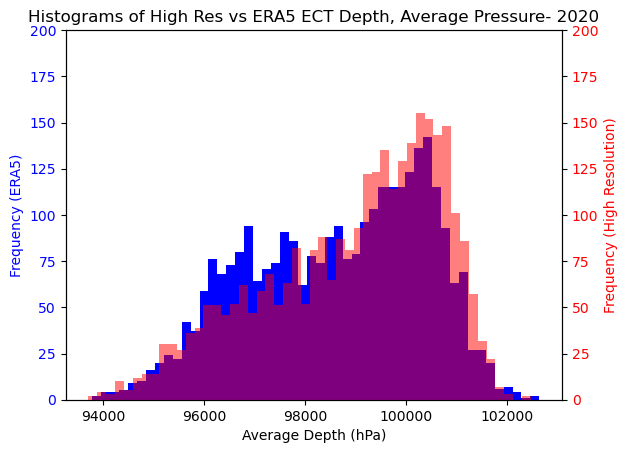

In [126]:
#Set up the histograms on two different y-axis for comparison

fig, ax1 = plt.subplots()

# ERA5 histogram on the left y-axis
ax1.hist(df_filt_ERA.avg_depth, bins = 50, label = 'ERA5 Frequency', color ='blue')
ax1.set_xlabel('Average Depth (hPa)')
ax1.set_ylabel('Frequency (ERA5)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim((0,200))


# Create a second y-axis
ax2 = ax1.twinx()

# High Resolution histogram on the right y-axis
ax2.hist(df_filt_HRes.avg_depth, bins=50, alpha= 0.5, label='High Resolution Frequency', color='red')
ax2.set_ylabel('Frequency (High Resolution)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim((0,200))


plt.title('Histograms of High Res vs ERA5 ECT Depth, Average Pressure- 2020')
plt.show()